In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
years = list(range(2001, 2022))
url_data ="https://admin.euroleague.net/main/statistics?mode=Leaders&entity=Players&seasonmode=Single&seasoncode=E2000&cat=FieldGoals3Percent&agg=PerGame"

In [3]:
for year in years:
    with open("threepointers_percentage_htmls/{}.html".format(year), "w+" , encoding="utf-8") as file :
        url = url_data.format(year)
        data = requests.get(url)
        file.write(data.text)

In [4]:
dfs = []
for year in years:
    with open("threepointers_percentage_htmls/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="StatsGridResults table responsive fixed-cols-2 table-left-cols-2 table-expand table-striped table-hover table-noborder table-centered table-condensed")
    player_table = soup.find_all(id="ctl00_ctl00_ctl00_ctl00_maincontainer_maincontent_contentpane_ctl01_ctl01_gvResults")[0]
    threepointers_percentage = pd.read_html(str(player_table))[0]
    threepointers_percentage["Year"] = year
    dfs.append(threepointers_percentage)

In [5]:
threepointers_percentage = pd.concat(dfs)
threepointers_percentage

,Rank,Player,Team,GamesG,AttemptedAtt.,Made,% Made%,Year
0,1,"RACCA, JORGERACCA, JORGE",PBCPAOK ThessalonikiPAOK Thessaloniki,13,2.08,1.23,59.26%,2001
1,2,"RIGAUDEAU, ANTOINERIGAUDEAU, A.",VIRKinder Virtus BolognaKinder Virtus Bologna,20,3.50,1.95,55.71%,2001
2,3,"DJORDJEVIC, SASADJORDJEVIC, S.",RMDReal MadridReal Madrid,11,4.27,2.36,55.32%,2001
3,4,"SLANINA, DONATASSLANINA, D.",ZALZalgiris KaunasZalgiris Kaunas,12,4.83,2.67,55.17%,2001
4,5,"STOMBERGAS, SAULIUSSTOMBERGAS, S.",BKNTau Ceramica Vitoria-GasteizTau Ceramica Vi...,22,3.91,2.00,51.16%,2001
...,...,...,...,...,...,...,...,...
45,46,"MENEGHIN, ANDREAMENEGHIN, A.",FORPAF BolognaPAF Bologna,15,4.33,1.60,36.92%,2021
46,47,"TOMIC, MILANTOMIC, M.",OLYOlympiakosOlympiakos,14,4.29,1.57,36.67%,2021
47,48,"KARNISOVAS, ARTURASKARNISOVAS, A.",FCBFC BarcelonaFC Barcelona,10,3.30,1.20,36.36%,2021
48,49,"SIGALAS, GIORGOSSIGALAS, G.",PBCPAOK ThessalonikiPAOK Thessaloniki,13,3.62,1.31,36.17%,2021


In [6]:
engine = create_engine('sqlite:///threepointers_percentage_leaders.db')
Session = sessionmaker(bind=engine)
session = Session()

In [7]:
threepointers_percentage.to_sql(
    name = "threepointers_percentage_leaders",
    con = engine,
    index = True,
    if_exists = "replace"
)

1050

In [ ]:
threepointers_percentage_leaders_select = session.execute('select * from "threepointers_percentage_leaders"')
threepointers_percentage_leaders_select.all()

In [6]:
threepointers_percentage.info

<bound method DataFrame.info of     Rank                             Player  \
0      1           RACCA, JORGERACCA, JORGE   
1      2    RIGAUDEAU, ANTOINERIGAUDEAU, A.   
2      3     DJORDJEVIC, SASADJORDJEVIC, S.   
3      4        SLANINA, DONATASSLANINA, D.   
4      5  STOMBERGAS, SAULIUSSTOMBERGAS, S.   
..   ...                                ...   
45    46       MENEGHIN, ANDREAMENEGHIN, A.   
46    47              TOMIC, MILANTOMIC, M.   
47    48  KARNISOVAS, ARTURASKARNISOVAS, A.   
48    49        SIGALAS, GIORGOSSIGALAS, G.   
49    50          SCHMIDT, CASEYSCHMIDT, C.   

                                                 Team  GamesG  AttemptedAtt.  \
0               PBCPAOK ThessalonikiPAOK Thessaloniki      13           2.08   
1       VIRKinder Virtus BolognaKinder Virtus Bologna      20           3.50   
2                           RMDReal MadridReal Madrid      11           4.27   
3                   ZALZalgiris KaunasZalgiris Kaunas      12           4.83   
4  

In [7]:
threepointers_percentage.isnull().sum()

Rank             0
Player           0
Team             0
GamesG           0
AttemptedAtt.    0
Made             0
% Made%          0
Year             0
dtype: int64

c:\Users\oki\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Player', ylabel='count'>

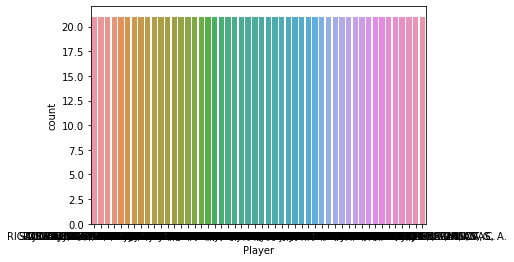

In [8]:
sns.countplot(threepointers_percentage['Player'])

In [9]:
columns =threepointers_percentage .columns.tolist()
columns

['Rank',
 'Player',
 'Team',
 'GamesG',
 'AttemptedAtt.',
 'Made',
 '% Made%',
 'Year']

In [25]:
threepointers_percentage.to_csv('threes.csv' , index=False)

In [27]:
df= pd.read_csv('threes.csv', names=['Rank','Player','Team','GamesG','AttemptedAtt','Made','% Made%','Year'])
df


,Rank,Player,Team,GamesG,AttemptedAtt,Made,% Made%,Year
0,Rank,Player,Team,GamesG,AttemptedAtt.,Made,% Made%,Year
1,1,"RACCA, JORGERACCA, JORGE",PBCPAOK ThessalonikiPAOK Thessaloniki,13,2.08,1.23,59.26%,2001
2,2,"RIGAUDEAU, ANTOINERIGAUDEAU, A.",VIRKinder Virtus BolognaKinder Virtus Bologna,20,3.5,1.95,55.71%,2001
3,3,"DJORDJEVIC, SASADJORDJEVIC, S.",RMDReal MadridReal Madrid,11,4.27,2.36,55.32%,2001
4,4,"SLANINA, DONATASSLANINA, D.",ZALZalgiris KaunasZalgiris Kaunas,12,4.83,2.67,55.17%,2001
...,...,...,...,...,...,...,...,...
1046,46,"MENEGHIN, ANDREAMENEGHIN, A.",FORPAF BolognaPAF Bologna,15,4.33,1.6,36.92%,2021
1047,47,"TOMIC, MILANTOMIC, M.",OLYOlympiakosOlympiakos,14,4.29,1.57,36.67%,2021
1048,48,"KARNISOVAS, ARTURASKARNISOVAS, A.",FCBFC BarcelonaFC Barcelona,10,3.3,1.2,36.36%,2021
1049,49,"SIGALAS, GIORGOSSIGALAS, G.",PBCPAOK ThessalonikiPAOK Thessaloniki,13,3.62,1.31,36.17%,2021


In [28]:
titles = list(df.columns)
titles

['Rank', 'Player', 'Team', 'GamesG', 'AttemptedAtt', 'Made', '% Made%', 'Year']

In [34]:
titles[1], titles[6] = titles[6], titles[1]
titles

['Rank', '% Made%', 'Year', 'GamesG', 'AttemptedAtt', 'Made', 'Player', 'Team']

In [36]:
df = df[titles]
df

,Rank,% Made%,Year,GamesG,AttemptedAtt,Made,Player,Team
0,Rank,% Made%,Year,GamesG,AttemptedAtt.,Made,Player,Team
1,1,59.26%,2001,13,2.08,1.23,"RACCA, JORGERACCA, JORGE",PBCPAOK ThessalonikiPAOK Thessaloniki
2,2,55.71%,2001,20,3.5,1.95,"RIGAUDEAU, ANTOINERIGAUDEAU, A.",VIRKinder Virtus BolognaKinder Virtus Bologna
3,3,55.32%,2001,11,4.27,2.36,"DJORDJEVIC, SASADJORDJEVIC, S.",RMDReal MadridReal Madrid
4,4,55.17%,2001,12,4.83,2.67,"SLANINA, DONATASSLANINA, D.",ZALZalgiris KaunasZalgiris Kaunas
...,...,...,...,...,...,...,...,...
1046,46,36.92%,2021,15,4.33,1.6,"MENEGHIN, ANDREAMENEGHIN, A.",FORPAF BolognaPAF Bologna
1047,47,36.67%,2021,14,4.29,1.57,"TOMIC, MILANTOMIC, M.",OLYOlympiakosOlympiakos
1048,48,36.36%,2021,10,3.3,1.2,"KARNISOVAS, ARTURASKARNISOVAS, A.",FCBFC BarcelonaFC Barcelona
1049,49,36.17%,2021,13,3.62,1.31,"SIGALAS, GIORGOSSIGALAS, G.",PBCPAOK ThessalonikiPAOK Thessaloniki


NameError: name 'percentage' is not defined

In [19]:
X = threes[columns[:-1]]
X

,Rank,Player,Team,GamesG,AttemptedAtt.,Made,% Made%
0,1,"RACCA, JORGERACCA, JORGE",PBCPAOK ThessalonikiPAOK Thessaloniki,13,2.08,1.23,59.26%
1,2,"RIGAUDEAU, ANTOINERIGAUDEAU, A.",VIRKinder Virtus BolognaKinder Virtus Bologna,20,3.50,1.95,55.71%
2,3,"DJORDJEVIC, SASADJORDJEVIC, S.",RMDReal MadridReal Madrid,11,4.27,2.36,55.32%
3,4,"SLANINA, DONATASSLANINA, D.",ZALZalgiris KaunasZalgiris Kaunas,12,4.83,2.67,55.17%
4,5,"STOMBERGAS, SAULIUSSTOMBERGAS, S.",BKNTau Ceramica Vitoria-GasteizTau Ceramica Vi...,22,3.91,2.00,51.16%
...,...,...,...,...,...,...,...
45,46,"MENEGHIN, ANDREAMENEGHIN, A.",FORPAF BolognaPAF Bologna,15,4.33,1.60,36.92%
46,47,"TOMIC, MILANTOMIC, M.",OLYOlympiakosOlympiakos,14,4.29,1.57,36.67%
47,48,"KARNISOVAS, ARTURASKARNISOVAS, A.",FCBFC BarcelonaFC Barcelona,10,3.30,1.20,36.36%
48,49,"SIGALAS, GIORGOSSIGALAS, G.",PBCPAOK ThessalonikiPAOK Thessaloniki,13,3.62,1.31,36.17%


In [20]:
y = threes['Player']
y.head()

0             RACCA, JORGERACCA, JORGE
1      RIGAUDEAU, ANTOINERIGAUDEAU, A.
2       DJORDJEVIC, SASADJORDJEVIC, S.
3          SLANINA, DONATASSLANINA, D.
4    STOMBERGAS, SAULIUSSTOMBERGAS, S.
Name: Player, dtype: object

In [21]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=42)

In [22]:
model = LogisticRegression().fit(X_train, y_train)

ValueError: could not convert string to float: 'ADAMS, THOMASADAMS, THOMAS'